In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_bar_chart(x, y, xlabel='', ylabel='', title='', figsize=(12,6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=x, y=y, palette='Blues_d', ax=ax)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=18)
    plt.xticks(rotation=90)
    plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


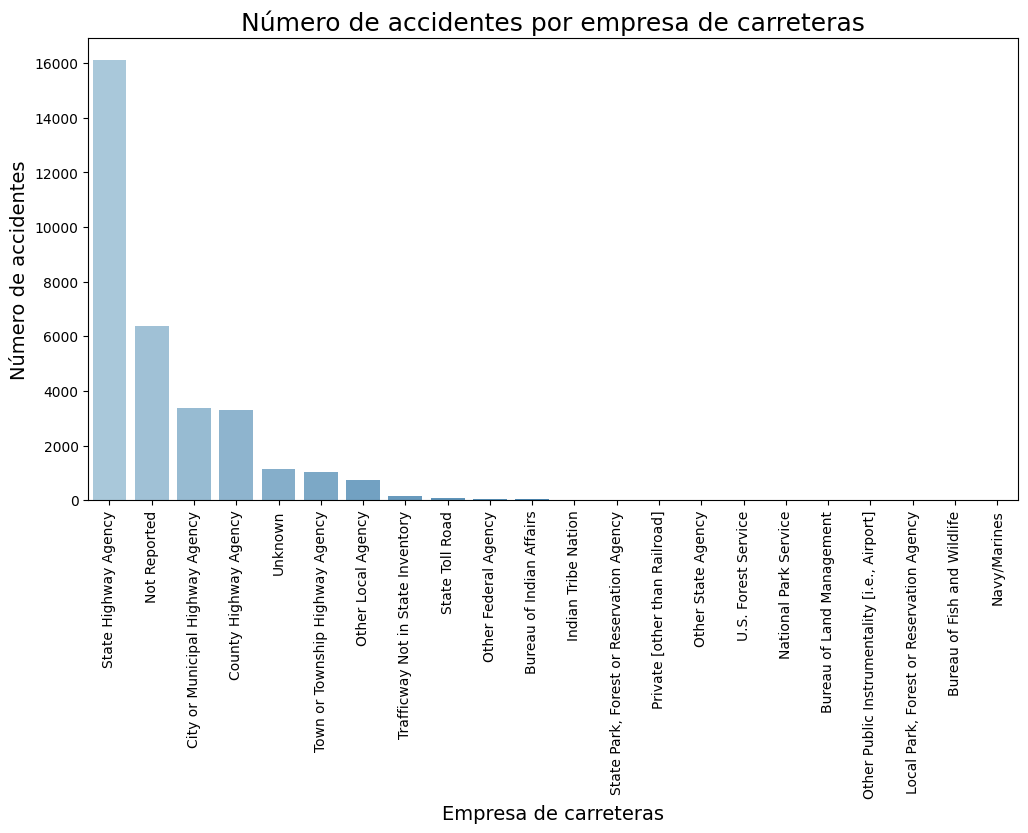

In [2]:
from google.cloud import bigquery
client = bigquery.Client(project='poto-382221')
query = """
SELECT ownership_name, COUNT(*) as num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY ownership_name
ORDER BY num_accidents DESC
"""

# Enviamos la consulta a BigQuery y obtenemos los resultados
query_job = client.query(query)
results = query_job.result()

# Convertimos los resultados a un dataframe de pandas
df = pd.DataFrame([(row.ownership_name, row.num_accidents) for row in results], columns=["ownership_name", "num_accidents"])
plot_bar_chart(x=df['ownership_name'], y=df['num_accidents'], xlabel='Empresa de carreteras', ylabel='Número de accidentes', title='Número de accidentes por empresa de carreteras')